In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("train.csv")

In [2]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,price
0,AGENT,1.0,BHK,Independent Floor,Chattarpur,500,Unfurnished,1 bathrooms,8500.0
1,AGENT,1.0,BHK,Apartment,Vasant Kunj,581,Furnished,2 bathrooms,21000.0
2,AGENT,1.0,BHK,Independent Floor,Malviya Nagar,500,Furnished,1 bathrooms,12000.0
3,AGENT,1.0,BHK,Apartment,Sector 23 Dwarka,415,Semi-Furnished,1 bathrooms,7200.0
4,AGENT,3.0,BHK,Apartment,mayur vihar phase 1,1550,Semi-Furnished,3 bathrooms,35000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700 entries, 0 to 29699
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    29694 non-null  object 
 1   bedroom        29697 non-null  float64
 2   layout_type    29689 non-null  object 
 3   property_type  29698 non-null  object 
 4   locality       29694 non-null  object 
 5   area           29700 non-null  int64  
 6   furnish_type   29696 non-null  object 
 7   bathroom       29404 non-null  object 
 8   price          29700 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum()

seller_type        6
bedroom            3
layout_type       11
property_type      2
locality           6
area               0
furnish_type       4
bathroom         296
price              0
dtype: int64

In [5]:
df=df.drop(['bathroom'],axis=1)

In [6]:
df.layout_type.fillna('BHK',inplace=True)

In [7]:
df1=df.copy()

<Axes: xlabel='seller_type'>

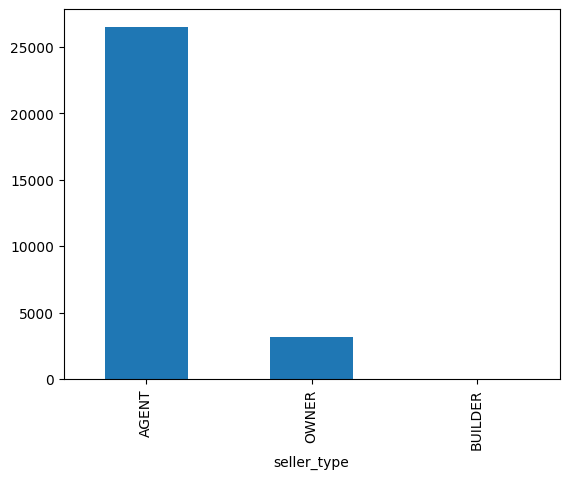

In [8]:
df1.seller_type.value_counts().plot.bar()

In [9]:
df1.seller_type.fillna('Agent',inplace=True)

In [10]:
df1.bedroom.median()

3.0

In [11]:
df1.bedroom.fillna(3,inplace=True)

<Axes: xlabel='furnish_type'>

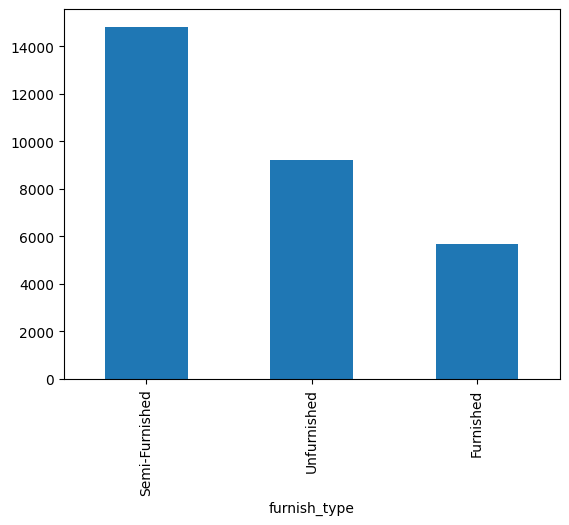

In [12]:
df1.furnish_type.value_counts().plot.bar()

In [13]:
df1.furnish_type.fillna('Semi-Furnishing',inplace=True)

In [14]:
df1.locality.fillna("No Locality",inplace=True)

In [15]:
df1.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    2
locality         0
area             0
furnish_type     0
price            0
dtype: int64

<Axes: xlabel='property_type'>

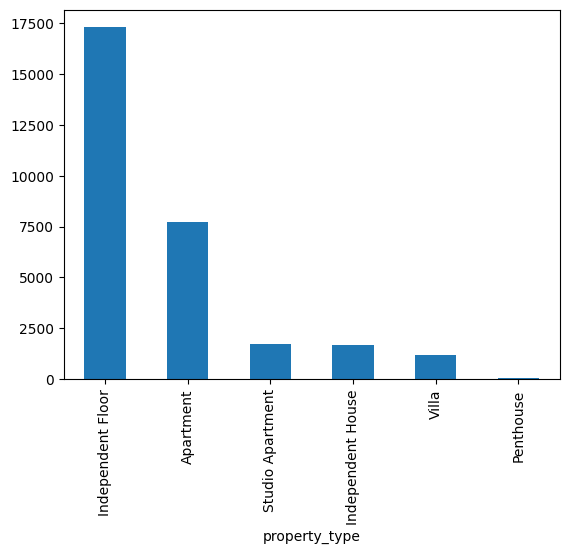

In [16]:
df1.property_type.value_counts().plot.bar()

In [17]:
df1.property_type.fillna('Independent Floor',inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29700 entries, 0 to 29699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    29700 non-null  object 
 1   bedroom        29700 non-null  float64
 2   layout_type    29700 non-null  object 
 3   property_type  29700 non-null  object 
 4   locality       29700 non-null  object 
 5   area           29700 non-null  int64  
 6   furnish_type   29700 non-null  object 
 7   price          29700 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [19]:
df1.isnull().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
area             0
furnish_type     0
price            0
dtype: int64

In [20]:
df1.head()

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,price
0,AGENT,1.0,BHK,Independent Floor,Chattarpur,500,Unfurnished,8500.0
1,AGENT,1.0,BHK,Apartment,Vasant Kunj,581,Furnished,21000.0
2,AGENT,1.0,BHK,Independent Floor,Malviya Nagar,500,Furnished,12000.0
3,AGENT,1.0,BHK,Apartment,Sector 23 Dwarka,415,Semi-Furnished,7200.0
4,AGENT,3.0,BHK,Apartment,mayur vihar phase 1,1550,Semi-Furnished,35000.0


In [21]:
x_train=df1['area']
y_train=df1['price']
x_train=(x_train-np.mean(x_train))/(np.std(x_train))
y_train=(y_train-np.mean(y_train))/(np.std(y_train))

In [22]:
print(x_train.shape)
print(y_train.shape)

(29700,)
(29700,)


In [23]:
print(type(x_train))

<class 'pandas.core.series.Series'>


In [24]:
print(type(y_train))

<class 'pandas.core.series.Series'>


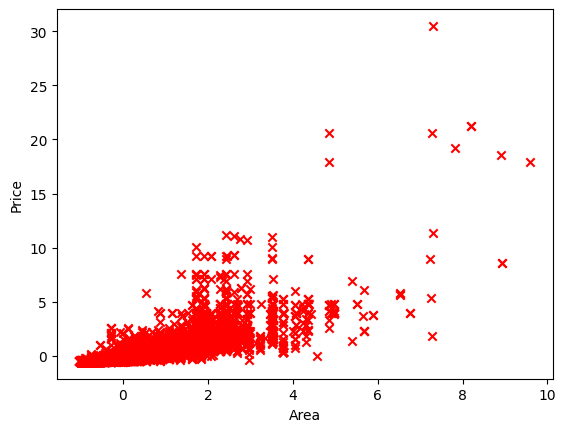

In [25]:
plt.scatter(x_train,y_train,marker='x',color='r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [26]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        cost+=(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [27]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb_i=np.dot(x[i],w)+b
        dj_dw+=(f_wb_i-y[i])*x[i]
        dj_db+=(f_wb_i-y[i])
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [28]:
import copy 
import math
def gradient_descent(x,y,w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m=len(x)
    J_history=[]
    w_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(m):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<40000:
            cost=cost_function(x,y,w,b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
             w_history.append(w)
             print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history

In [33]:
initial_w=0.
initial_b=0.
iterations =2000
alpha = 0.01
w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     0.49   
Iteration  200: Cost     0.16   
Iteration  400: Cost     0.16   
Iteration  600: Cost     0.16   
Iteration  800: Cost     0.16   
Iteration 1000: Cost     0.16   
Iteration 1200: Cost     0.16   
Iteration 1400: Cost     0.16   
Iteration 1600: Cost     0.16   
Iteration 1800: Cost     0.16   
Iteration 2000: Cost     0.16   
Iteration 2200: Cost     0.16   
Iteration 2400: Cost     0.16   
Iteration 2600: Cost     0.16   
Iteration 2800: Cost     0.16   
Iteration 3000: Cost     0.16   
Iteration 3200: Cost     0.16   
Iteration 3400: Cost     0.16   
Iteration 3600: Cost     0.16   
Iteration 3800: Cost     0.16   
Iteration 4000: Cost     0.16   
Iteration 4200: Cost     0.16   
Iteration 4400: Cost     0.16   
Iteration 4600: Cost     0.16   
Iteration 4800: Cost     0.16   
Iteration 5000: Cost     0.16   
Iteration 5200: Cost     0.16   
Iteration 5400: Cost     0.16   
Iteration 5600: Cost     0.16   
Iteration 5800: Cost     0.16   
Iteration 

In [34]:
m=x_train.shape[0]
predicted=np.zeros(m)
for i in range(m):
    predicted[i]=x_train[i]*w+b

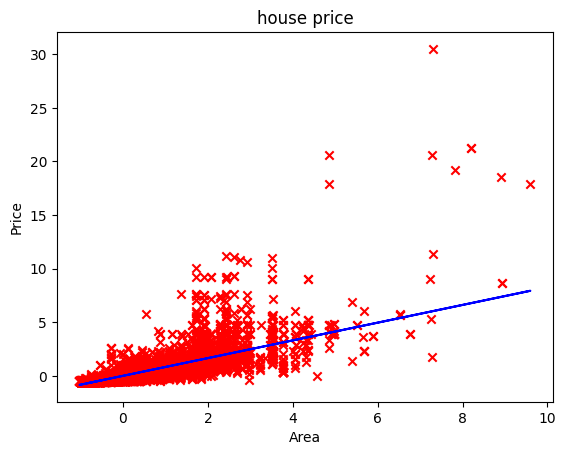

In [35]:
plt.plot(x_train,predicted,c='b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('house price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [47]:
df2=pd.read_csv("test.csv")

In [48]:
df2.head()

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom
0,AGENT,3.0,BHK,Independent Floor,Safdarjung Enclave,1900,Semi-Furnished,3 bathrooms
1,AGENT,5.0,BHK,Independent Floor,Greater Kailash II,6521,Unfurnished,5 bathrooms
2,OWNER,1.0,BHK,Independent House,Jhil Mil Colony,450,Unfurnished,1 bathrooms
3,AGENT,1.0,BHK,Independent Floor,Greater Kailash,1000,Furnished,1 bathrooms
4,AGENT,3.0,BHK,Apartment,Sector 10 Dwarka,1600,Semi-Furnished,2 bathrooms


In [49]:
x_test=df2['area']

In [50]:
def predict(x,w,b):
   m=x.shape[0]
   predicted=np.zeros(m)
   for i in range(m):
       predicted[i]=x[i]*w+b
   return predicted

In [51]:
y_pred=predict(x_test,w,b)

In [52]:
print(y_pred)

[1570.61593679 5390.51922305  371.98798503 ... 1405.28794344 2687.40653184
  595.18077605]


In [53]:
len(x_test)

3300

In [54]:
len(y_pred)

3300

In [55]:
prediction_df = pd.DataFrame({'Actual': x_test, 'Predicted': y_pred})

In [56]:
prediction_df.to_csv('predict.csv', index=False)